In [1]:
import wfdb
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wfdb import processing
import pandas as pd

{'record_name': '47946', 'n_sig': 12, 'fs': 400, 'counter_freq': None, 'base_counter': None, 'sig_len': 2934, 'base_time': None, 'base_date': None, 'comments': ['Age: 39', 'Sex: Female', 'Chagas label: True', 'Source: CODE-15%'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[-0.469, -1.397, -0.928, ...,  0.059, -0.547, -0.381],
       [-0.532, -1.513, -0.981, ...,  0.152, -0.476, -0.308],
       [-0.763, -1.134, -0.371, ..., -0.012, -0.595, -0.528],
       ...,
       [-0.535, -1.474, -0.939, ...,  0.1  , -0.609, -0.436],
       [-0.43 , -1.397, -0.967, ...,  0.059, -0.596, -0.43 ],
       [-0.09 , -0.308, -0.219, ...,  0.01 , -0.132, -0.096]],
      shape=(2934, 12)), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat', '47946.dat'], 'fmt': ['16', '16', '16', '16'

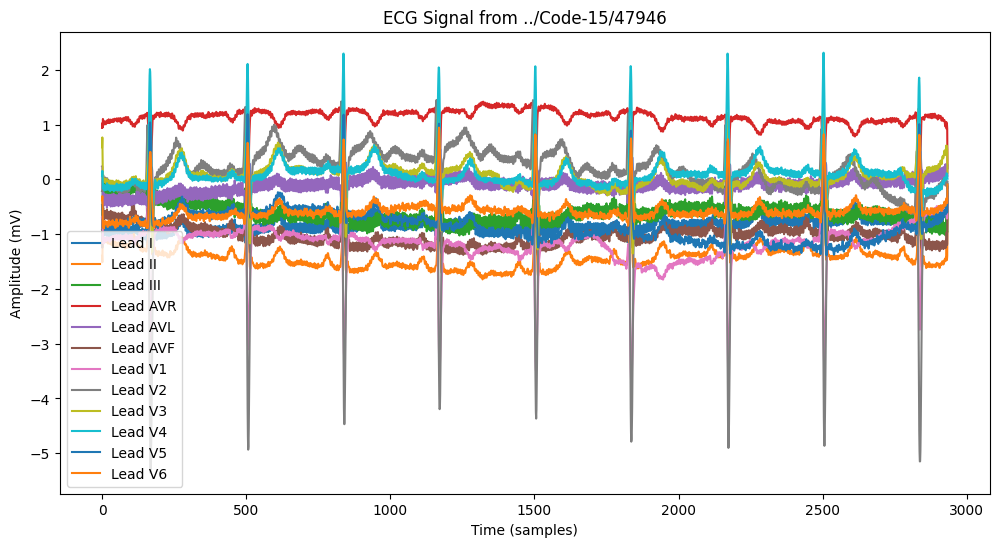

In [27]:
# Path to a sample WFDB record (change this to one of your extracted files)
record_name = "../Code-15/47946"


# Load the WFDB record
record = wfdb.rdrecord(record_name)

# Display metadata
print(record.__dict__)

# Extract signals and plot them
plt.figure(figsize=(12, 6))
for i in range(record.p_signal.shape[1]):  # Loop through each lead (ECG channel)
    plt.plot(record.p_signal[:, i], label=f"Lead {record.sig_name[i]}")

plt.title(f"ECG Signal from {record_name}")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()


In [28]:
print("Record Name:", record.record_name)
print("Sampling Frequency:", record.fs)
print("Number of Leads:", len(record.sig_name))
print("Lead Names:", record.sig_name)
print("Gain Factors:", record.adc_gain)
print("Baseline Offsets:", record.baseline)
print("Units:", record.units)

# Check total number of samples divided by sampling frequency
total_samples = record.p_signal.shape[0]
total_time = total_samples / record.fs
print("Total Samples:", total_samples)
print("Total Time (seconds):", total_time)

# # Print all the key value of the record one by one
# for key, value in record.__dict__.items():
#     print(key, ":", value)
    


Record Name: 47946
Sampling Frequency: 400
Number of Leads: 12
Lead Names: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Gain Factors: [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
Baseline Offsets: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Units: ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']
Total Samples: 2934
Total Time (seconds): 7.335


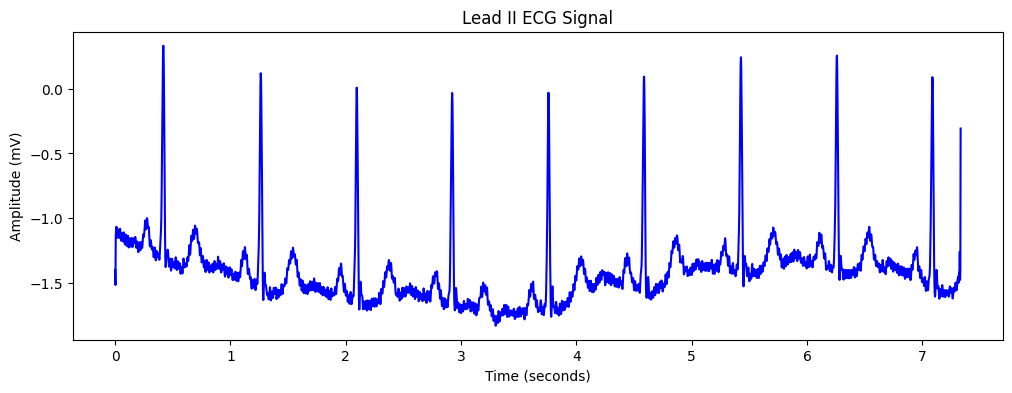

In [37]:
lead_index = 1  # Change to any lead index you want to visualize
time = len(record.p_signal[:, lead_index])/400 #seconds
timepoints = np.arange( len(record.p_signal[:, lead_index]) )/len(record.p_signal[:, lead_index])  *time



plt.figure(figsize=(12, 4))
plt.plot(timepoints, record.p_signal[:, lead_index], color="blue")
plt.title(f"Lead {record.sig_name[lead_index]} ECG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.show()


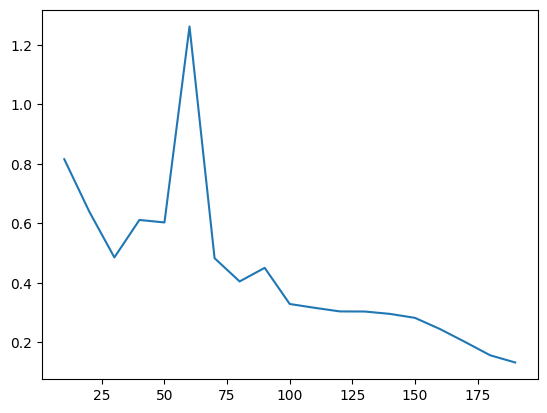

In [45]:
sf = 400
timePoints = .1 
segment = record.p_signal[:int(sf*timePoints), lead_index] 

dft = np.fft.fft(segment )


fq_re = 1/sf

samples = len(dft)

# Get the number of samples
n = len( segment )

# Create the frequency axis
freq = np.fft.fftfreq(n, d=fq_re)

sortFreqIdx = np.argsort( freq ) 

# Get the magnitude spectrum
magnitude = np.abs(dft)

# Now you can plot frequency vs magnitude if needed

f =freq[sortFreqIdx]
m =  magnitude[sortFreqIdx]
plt.plot( f[f>0], m[f>0]  ) 




In [30]:
# Convert signals into a DataFrame
df = pd.DataFrame(record.p_signal, columns=record.sig_name)

# Summary statistics
print(df.describe())

# Check for missing values
print("Missing Values:", df.isnull().sum())


                 I           II          III          AVR          AVL  \
count  2934.000000  2934.000000  2934.000000  2934.000000  2934.000000   
mean     -0.804788    -1.409112    -0.604338     1.111904    -0.097748   
std       0.195372     0.263279     0.201388     0.208964     0.148337   
min      -1.252000    -1.827000    -1.132000    -0.313000    -0.670000   
25%      -0.919000    -1.565000    -0.739750     1.063000    -0.187000   
50%      -0.833000    -1.427000    -0.625000     1.142000    -0.096000   
75%      -0.741000    -1.328000    -0.493500     1.221000    -0.008000   
max       0.452000     0.330000     0.381000     1.416000     0.553000   

               AVF           V1           V2           V3           V4  \
count  2934.000000  2934.000000  2934.000000  2934.000000  2934.000000   
mean     -1.004234    -1.199271     0.062463     0.082336     0.118769   
std       0.213128     0.389816     0.821816     0.278836     0.315456   
min      -1.394000    -3.723000    -5

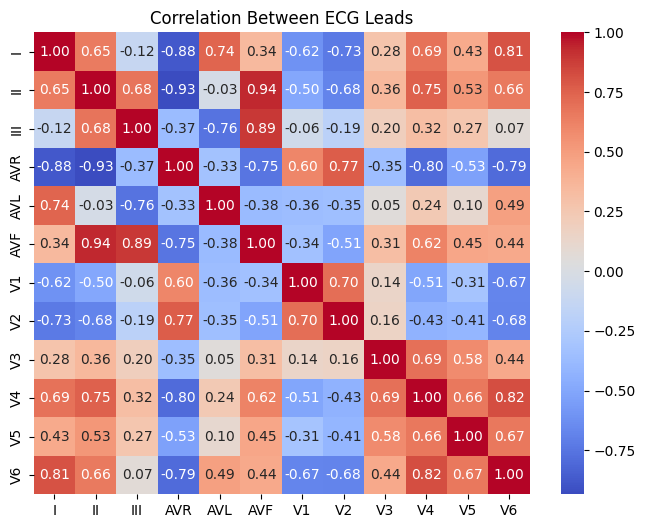

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between ECG Leads")
plt.show()


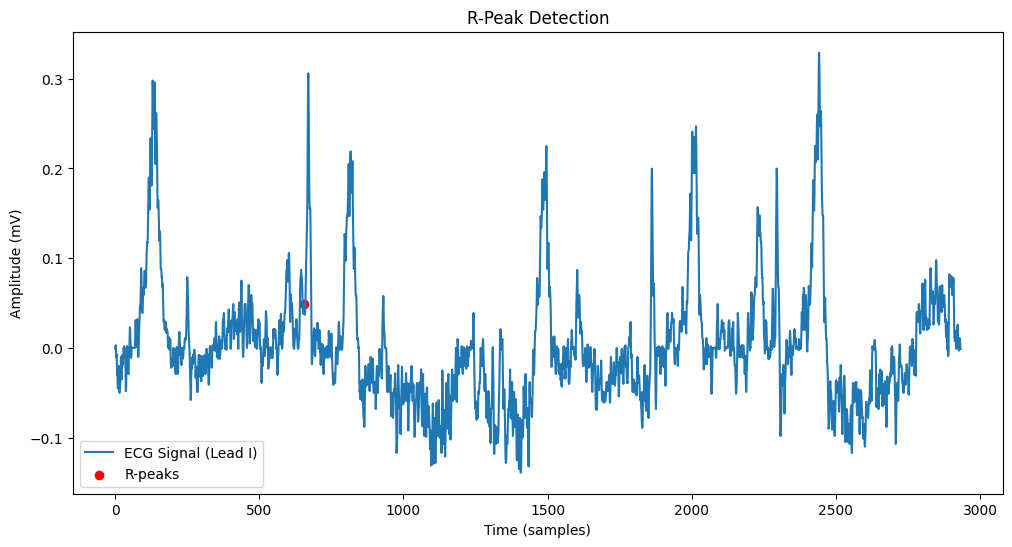

Estimated Heart Rate (BPM): nan


g:\Codes\Physionet\code\venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
g:\Codes\Physionet\code\venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Detect peaks in Lead I (change the index if needed)
r_peaks = processing.gqrs_detect(record.p_signal[:, 0], fs=record.fs)

# Plot ECG with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(record.p_signal[:, 0], label="ECG Signal (Lead I)")
plt.scatter(r_peaks, record.p_signal[r_peaks, 0], color="red", marker="o", label="R-peaks")
plt.title("R-Peak Detection")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

# Calculate heart rate from R-peaks
rr_intervals = np.diff(r_peaks) / record.fs  # Convert to seconds
heart_rate = 60 / rr_intervals  # Convert to BPM

print(f"Estimated Heart Rate (BPM): {np.mean(heart_rate):.2f}")


# CSV File Data

In [48]:
# Load both CSV files (Replace with your actual filenames)
df1 = pd.read_csv("../Code-15-base/exams.csv")  # First CSV (original dataset with ECG & patient info)
df2 = pd.read_csv("../Code-15-base/code15_chagas_labels.csv")  # Second CSV (exam_id, patient_id, chagas info)

# Merge both datasets on 'exam_id'
df = pd.merge(df1, df2, on="exam_id", how="inner")  # Change to "left" if needed

# Ensure only one 'patient_id' column remains
if 'patient_id_x' in df.columns and 'patient_id_y' in df.columns:
    # Check if both patient_id columns match
    if (df['patient_id_x'] == df['patient_id_y']).all():
        df = df.drop(columns=['patient_id_y'])  # Drop the duplicate column
        df = df.rename(columns={'patient_id_x': 'patient_id'})  # Rename properly
    else:
        print("⚠️ Warning: Patient IDs do not match for all rows!")

# Save the cleaned, merged dataset
df.to_csv("merged-code-15.csv", index=False)

# Display first few rows
print("✅ Merged Data Preview:")
print(df.head())

✅ Merged Data Preview:
   exam_id  age  is_male  nn_predicted_age  1dAVb   RBBB   LBBB     SB     ST  \
0  1169160   38     True         40.160484  False  False  False  False  False   
1  2873686   73     True         67.059440  False  False  False  False  False   
2   168405   67     True         79.621740  False  False  False  False  False   
3   271011   41     True         69.750260  False  False  False  False  False   
4   384368   73     True         78.873460  False  False  False  False  False   

      AF  patient_id  death     timey  normal_ecg         trace_file  chagas  
0  False      523632  False  2.098628        True  exams_part13.hdf5   False  
1  False     1724173  False  6.657529       False  exams_part13.hdf5   False  
2   True       51421  False  4.282188       False  exams_part13.hdf5   False  
3  False     1737282  False  4.038353        True  exams_part13.hdf5   False  
4  False      331652  False  3.786298       False  exams_part13.hdf5   False  


In [49]:
# Load CSV file (Change 'your_file.csv' to your actual
df = pd.read_csv("merged-code-15.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check dataset info
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   exam_id  age  is_male  nn_predicted_age  1dAVb   RBBB   LBBB     SB     ST  \
0  1169160   38     True         40.160484  False  False  False  False  False   
1  2873686   73     True         67.059440  False  False  False  False  False   
2   168405   67     True         79.621740  False  False  False  False  False   
3   271011   41     True         69.750260  False  False  False  False  False   
4   384368   73     True         78.873460  False  False  False  False  False   

      AF  patient_id  death     timey  normal_ecg         trace_file  chagas  
0  False      523632  False  2.098628        True  exams_part13.hdf5   False  
1  False     1724173  False  6.657529       False  exams_part13.hdf5   False  
2   True       51421  False  4.282188       False  exams_part13.hdf5   False  
3  False     1737282  False  4.038353        True  exams_part13.hdf5   False  
4  False      331652  False  3.786298       False  exams_part13.hdf5   False  

Dataset I

In [50]:
# For all columns, check for missing values
for col in df.columns:
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

Missing values in exam_id: 0
Missing values in age: 0
Missing values in is_male: 0
Missing values in nn_predicted_age: 0
Missing values in 1dAVb: 0
Missing values in RBBB: 0
Missing values in LBBB: 0
Missing values in SB: 0
Missing values in ST: 0
Missing values in AF: 0
Missing values in patient_id: 0
Missing values in death: 109939
Missing values in timey: 109939
Missing values in normal_ecg: 0
Missing values in trace_file: 0
Missing values in chagas: 0


In [52]:
# Count unique values in categorical columns
categorical_columns = ['is_male', 'death', 'normal_ecg', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF','chagas']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# Unique value in patient_id
print("\nUnique values in patient_id:")
print(df['patient_id'].value_counts())

# total number of unique patients
print("\nTotal number of unique patients:")
print(len(df['patient_id'].unique()))



Unique values in is_male:
is_male
False    205046
True     138378
Name: count, dtype: int64

Unique values in death:
death
False    225154
True       8331
Name: count, dtype: int64

Unique values in normal_ecg:
normal_ecg
False    209027
True     134397
Name: count, dtype: int64

Unique values in 1dAVb:
1dAVb
False    337753
True       5671
Name: count, dtype: int64

Unique values in RBBB:
RBBB
False    333927
True       9497
Name: count, dtype: int64

Unique values in LBBB:
LBBB
False    337438
True       5986
Name: count, dtype: int64

Unique values in SB:
SB
False    337861
True       5563
Name: count, dtype: int64

Unique values in ST:
ST
False    335857
True       7567
Name: count, dtype: int64

Unique values in AF:
AF
False    336486
True       6938
Name: count, dtype: int64

Unique values in chagas:
chagas
False    336863
True       6561
Name: count, dtype: int64

Unique values in patient_id:
patient_id
69479      32
1265141    23
57221      23
100113     22
1569128    19
     

In [9]:
# Convert Boolean values from string to actual Boolean type (if necessary)
df[categorical_columns] = df[categorical_columns].applymap(lambda x: True if str(x).upper() == "TRUE" else False)

# Convert age and timey to numeric (if necessary)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['nn_predicted_age'] = pd.to_numeric(df['nn_predicted_age'], errors='coerce')
df['timey'] = pd.to_numeric(df['timey'], errors='coerce')

C:\Users\ssami\AppData\Local\Temp\ipykernel_21296\1153683344.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[categorical_columns] = df[categorical_columns].applymap(lambda x: True if str(x).upper() == "TRUE" else False)


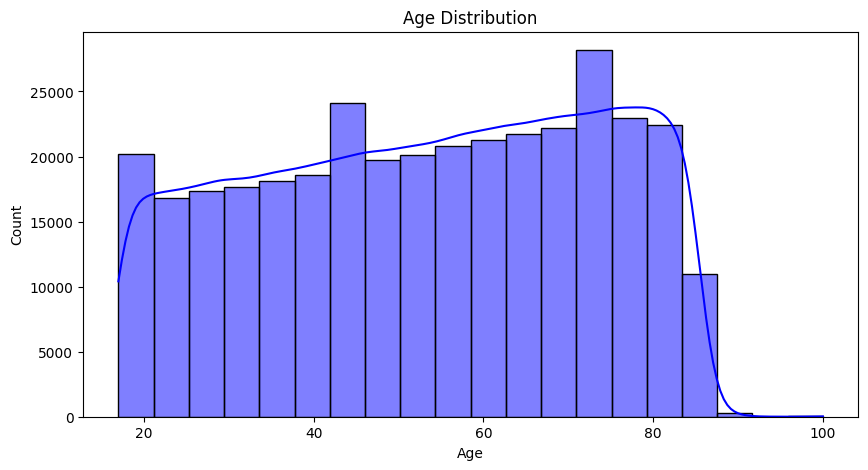

In [10]:
# 1. Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

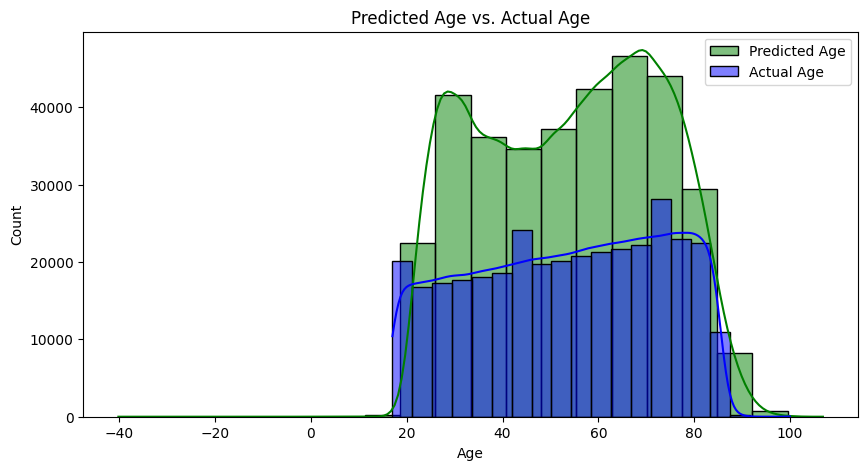

In [11]:

# 2. Distribution of nn_predicted_age vs. Actual Age
plt.figure(figsize=(10, 5))
sns.histplot(df['nn_predicted_age'], bins=20, kde=True, color='green', label="Predicted Age")
sns.histplot(df['age'], bins=20, kde=True, color='blue', alpha=0.5, label="Actual Age")
plt.title("Predicted Age vs. Actual Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\ssami\AppData\Local\Temp\ipykernel_21296\1223145827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['death'], palette="pastel")


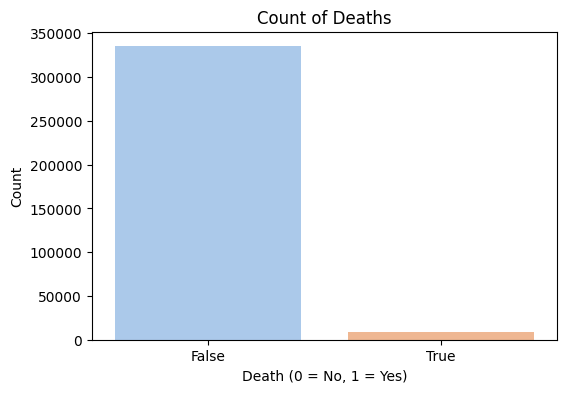

In [13]:
# 4. Count of Deaths
plt.figure(figsize=(6, 4))
sns.countplot(x=df['death'], palette="pastel")
plt.title("Count of Deaths")
plt.xlabel("Death (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

C:\Users\ssami\AppData\Local\Temp\ipykernel_21296\2824739598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['normal_ecg'], palette="pastel")


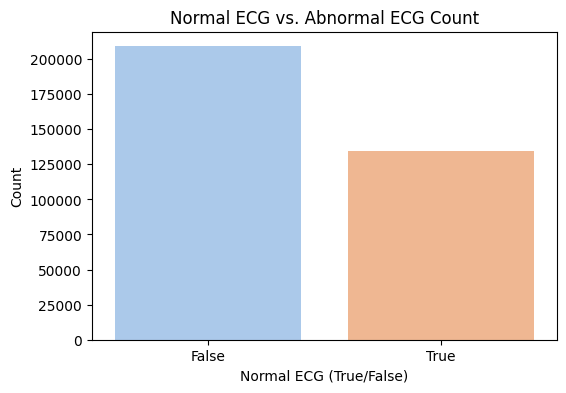

In [14]:
# 5. Normal ECG vs. Abnormal ECG Count
plt.figure(figsize=(6, 4))
sns.countplot(x=df['normal_ecg'], palette="pastel")
plt.title("Normal ECG vs. Abnormal ECG Count")
plt.xlabel("Normal ECG (True/False)")
plt.ylabel("Count")
plt.show()

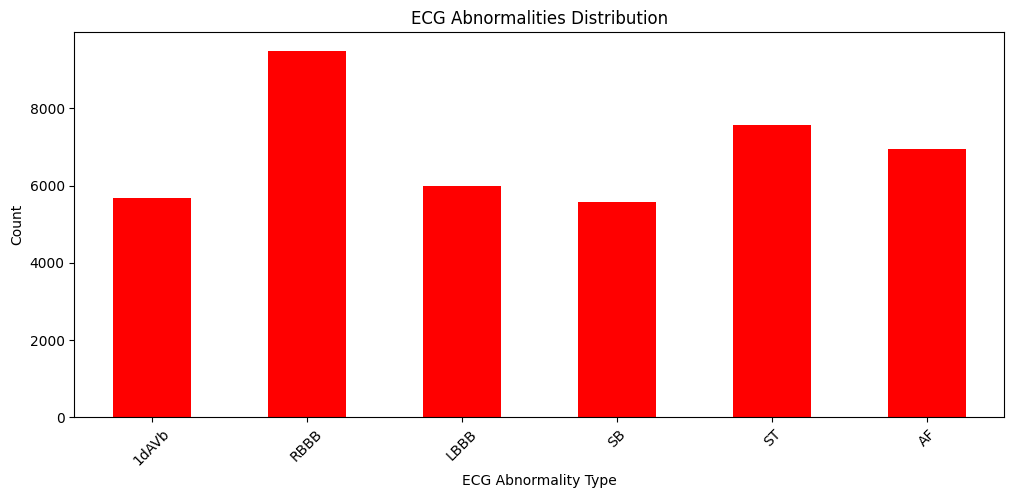

In [15]:
# 6. Distribution of ECG Abnormalities
plt.figure(figsize=(12, 5))
df[['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']].sum().plot(kind='bar', color='red')
plt.title("ECG Abnormalities Distribution")
plt.ylabel("Count")
plt.xlabel("ECG Abnormality Type")
plt.xticks(rotation=45)
plt.show()

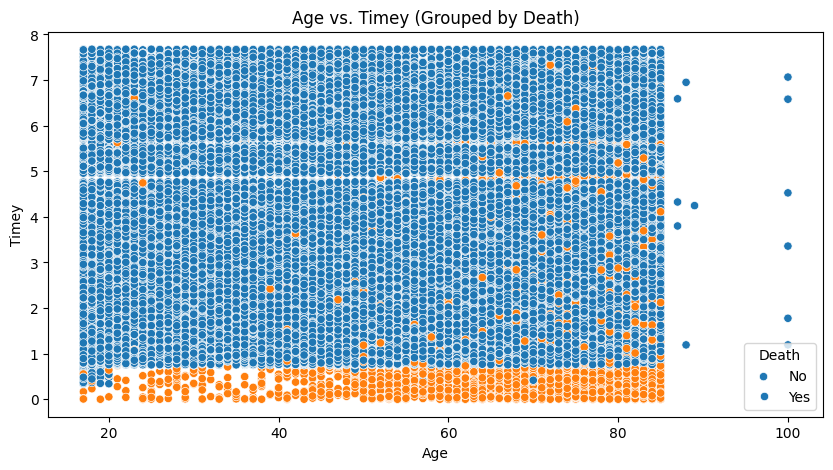

In [16]:
# 7. Age vs. Timey Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['age'], y=df['timey'], hue=df['death'])
plt.title("Age vs. Timey (Grouped by Death)")
plt.xlabel("Age")
plt.ylabel("Timey")
plt.legend(title="Death", labels=["No", "Yes"])
plt.show()

C:\Users\ssami\AppData\Local\Temp\ipykernel_21296\3953383109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['death'], y=df['age'], palette="coolwarm")


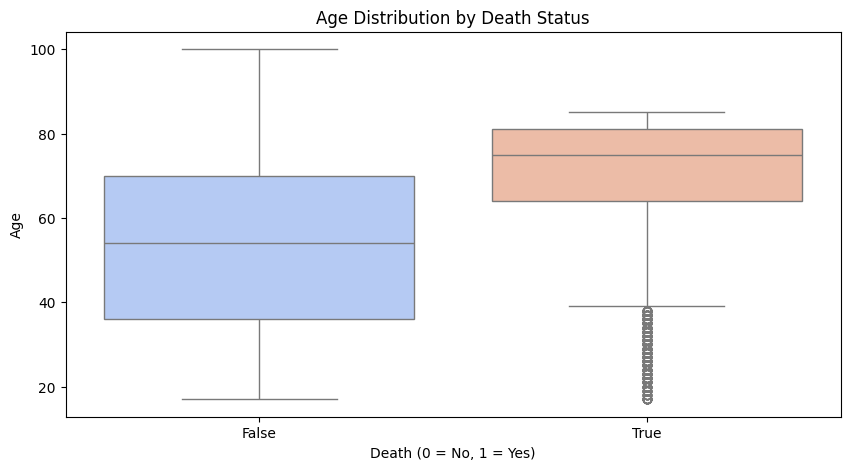

In [17]:
# 8. Comparing Age of Patients Who Died vs. Survived
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['death'], y=df['age'], palette="coolwarm")
plt.title("Age Distribution by Death Status")
plt.xlabel("Death (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

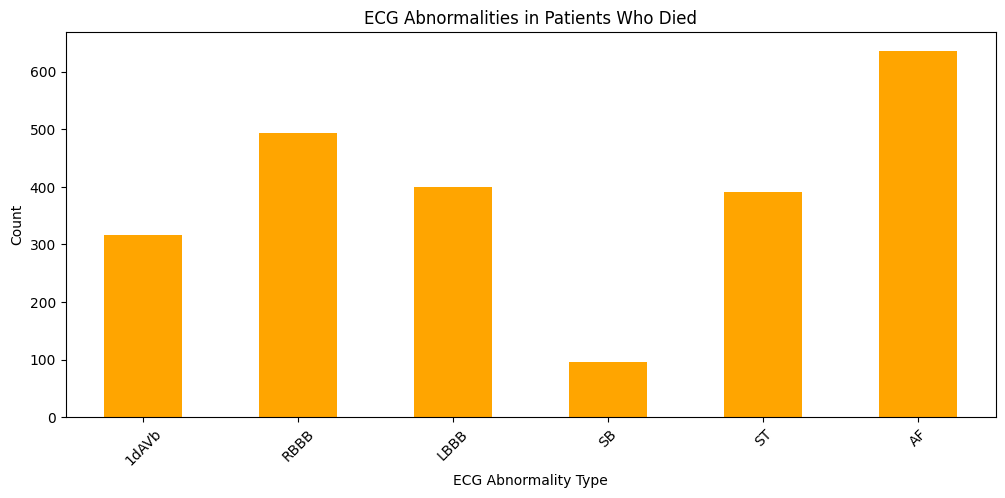

In [18]:
# 9. ECG Abnormalities in Patients Who Died
death_cases = df[df['death'] == True]
plt.figure(figsize=(12, 5))
death_cases[['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']].sum().plot(kind='bar', color='orange')
plt.title("ECG Abnormalities in Patients Who Died")
plt.ylabel("Count")
plt.xlabel("ECG Abnormality Type")
plt.xticks(rotation=45)
plt.show()

Missing values in exam_id: 0
Missing values in age: 0
Missing values in is_male: 0
Missing values in nn_predicted_age: 0
Missing values in 1dAVb: 0
Missing values in RBBB: 0
Missing values in LBBB: 0
Missing values in SB: 0
Missing values in ST: 0
Missing values in AF: 0
Missing values in patient_id: 0
Missing values in death: 0
Missing values in timey: 109939
Missing values in normal_ecg: 0
Missing values in trace_file: 0
Missing values in chagas: 0
